# Adversarial Search: Playing Connect 4

Student Name: Miller Boyd

I have used the following AI tools: none

I understand that my submission needs to be my own work: MB

## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

In [84]:
# Your code/answer goes here.
# Your code/answer goes here.
import numpy as np

# sets initial board to empty
def init_state (board=(6, 7)):
    return np.full(board=board, fill_value=0)

# possible action locations
actions = {0,1,2,3,4,5,6}

def transition_model (player, state, action):
    col_seg = state[:, action]
    spot = np.where(col_seg == 0)[0]

    # if there is spaces in the column
    if spot.size > 0:
        row = spot[-1]
        state[row,action]  = player
        return state

    return None

# define if the user has made a goal
# state is the current board
def goal (player, state, move):    

    # Draw, so neutral utility
    if np.all(state != 0):
        return 0 

    x,y = move
    x2,y2 = move

    row_seg = state[x, max(0, y-3):min(len(state), y+4)]
    col_seg = state[max(0, x-3):min(len(state[0]), x+4), y]
    diag_down_seg = [state[x][y]]
    diag_up_seg = [state[x][y]]

    while x < len(state) and x2 >= 0 and y < len(state[0] and y2 >= 0):
        # increment / decrement indexes
        x += 1
        y += 1
        x2 -= 1
        y2 -= 1

        # getting upper left
        # -x-y
        if x2 >= 0 and y2 >=0:
            diag_down_seg.insert(0, state[x][y])
        
        # getting lower right
        # +x+y
        if x < len(state) and y < len(state[0]):
            diag_down_seg.append(state[x][y])

        # getting lower left
        # -x+y
        if x2 >= 0 and y < len(state[0]):
            diag_up_seg.insert(0, state[x][y])
        
        # getting upper right
        # +x-y
        if x < len(state) and y >= 0:
            diag_up_seg.append(state[x][y])

    winning_sequence = [player] * 4
    # check row
    if np.any(np.convolve((row_seg == player).astype(int), winning_sequence, mode='valid') == 4):
        return player
    # check col
    elif np.any(np.convolve((col_seg == player).astype(int), winning_sequence, mode='valid') == 4):
        return player
    # check diagonal down
    elif np.any(np.convolve((diag_down_seg == player).astype(int), winning_sequence, mode='valid') == 4):
        return player
    # check diagonal down
    elif np.any(np.convolve((diag_up_seg == player).astype(int), winning_sequence, mode='valid') == 4):
        return player

    return None

How big is the state space? Give an estimate and explain it.

In [83]:
# Your code/ answer goes here.
positions = 6 * 7
state_space = 3^positions

# you have possible states per position, so we would have 3 possible states and 42 possible positions

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [82]:
# Your code/ answer goes here.


## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [81]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

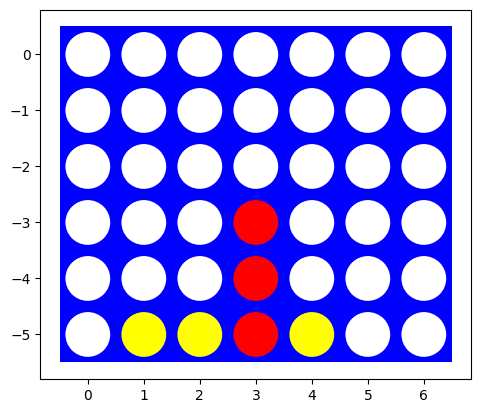

In [80]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [79]:
# Your code/ answer goes here.

import numpy as np
import random

class ConnectFourBase:

    def __init__(self, mark, rows=6, columns=7, board=None):
        self.rows = rows
        self.columns = columns
        if board is None:
            self.board = np.zeros((rows, columns), dtype=int)
        else:
            self.board = board
        self.current_player = mark

    def create_random_board(self, rows=None, columns=None):
        # Create an empty board
        if rows == None: rows = self.rows
        if columns == None: columns = self.columns
        board = np.zeros((rows, columns), dtype=int)
        player = 1

        for col in range(columns):
            # Determine a random number of pieces in this column
            pieces_in_col = random.randint(0, rows)

            for row in range(pieces_in_col):
                # Add a piece to the board, ensuring it's either a 1 or -1
                board[row, col] = player
                player *= -1

        # The board has been built bottom-up, but traditionally, we visualize Connect 4 boards top-down,
        # so we need to flip it vertically.
        self.board = np.flip(board, 0)

    # will return a +1 if player 1 has played and player 2 has not, otherwise a zero if player 2 has played or no playe has
    # assuming game has started when function is called
    def get_player(self):
        num_plays = np.count_nonzero(self.board)

        # If the number of plays is even, it's player 1's turn (return 1). Otherwise, it's player 2's turn (return -1).
        return 1 if num_plays % 2 == 0 else -1


    # returns an array with every column with available moves
    def actions(self):
        return [col for col in range(len(self.board[0])) if 0 in self.board[:,col]]

    # update the state with the action
    def result (self, action):
        state = self.board.copy()
        col_seg = state[:, action]
        spot = np.where(col_seg == 0)[0]

        # if there is spaces in the column
        if spot.size > 0:
            row = spot[-1]
            state[row,action]  = self.current_player
            return state

        return None

    def check_board(self):
        # Define the winning sequence for players
        player_markers = [1, -1]

        # Define directions to check: vertical, horizontal, diagonal down-right, diagonal up-right
        directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]

        for player in player_markers:
            for row in range(self.rows):
                for col in range(self.columns):
                    # Check all four directions from the current cell
                    for dr, dc in directions:
                        if self.check_direction(row, col, dr, dc, player):
                            return player  # Current player wins

        # Check for a full board without a winner (draw)
        if np.all(self.board != 0):
            return 0  # Draw

        return 2  # No winner yet
    
    def check_direction(self, start_row, start_col, dr, dc, player):
        # Check if a line of four of the player's pieces exists starting from (start_row, start_col) in direction (dr, dc)
        for i in range(4):
            row = start_row + i * dr
            col = start_col + i * dc
            if not (0 <= row < self.rows and 0 <= col < self.columns):  # Check bounds
                return False
            if self.board[row, col] != player:
                return False
        return True

    def terminal(self):
        # The game is over if someone has won or the board is full (a draw).
        result = self.check_board()
        if result != 2:  # 2 indicates the game is still going on
            return True
        return False


    def utility(self):
        result = self.check_board()
        if result == 1:  # Player 1 wins
            return 1
        elif result == -1:  # Player 2 wins
            return -1
        elif result == 0:  # Draw
            return 0  # Draw is typically considered a neutral outcome
        else:
            raise ValueError("Utility called on non-terminal state")



Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [78]:
# Your code/ answer goes here.
class RandomAgent:
    def __init__(self, mark):
        self.mark = mark

    def choose_action(self, game):
        possible_moves = game.actions()
        if possible_moves:
            return random.choice(possible_moves)
        return None

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [9]:
# Your code/ answer goes here.
def simulate_games(agent1, agent2, num_games):
    results = {'Player 1 Wins': 0, 'Player 2 Wins': 0, 'Draws': 0}
    for _ in range(num_games):
        # Initialize the game
        game = ConnectFourBase(mark=1)  # Start with player 1

        while not game.terminal():
            current_agent = agent1 if game.get_player() == 1 else agent2
            action = current_agent.choose_action(game)
            game.board = game.result(action)  # Update the game state
            game.current_player *= -1  # Switch player

        result = game.utility()
        if result == 1:
            results['Player 1 Wins'] += 1
        elif result == -1:
            results['Player 2 Wins'] += 1
        else:
            results['Draws'] += 1

    return results


agent1 = RandomAgent(mark=1)
agent2 = RandomAgent(mark=-1)
num_games = 1000

game_results = simulate_games(agent1, agent2, num_games)
print("Game results after", num_games, "games:", game_results)


Game results after 1000 games: {'Player 1 Wins': 554, 'Player 2 Wins': 443, 'Draws': 3}


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Important Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [70]:
# Your code/ answer goes here.
import numpy as np
import math

class ConnectFourMMABP:

    def __init__(self, mark, rows=6, columns=7, board=None):
        self.rows = rows
        self.columns = columns
        if board is None:
            self.board = np.zeros((rows, columns), dtype=int)
        else:
            self.board = np.array(board, dtype=int)
        self.current_player = mark
        self.last_move = []

    def create_random_board(self, rows=None, columns=None):
        # Create an empty board
        if rows == None: rows = self.rows
        if columns == None: columns = self.columns
        board = np.zeros((rows, columns), dtype=int)
        player = self.get_player()

        for col in range(columns):
            # Determine a random number of pieces in this column
            pieces_in_col = random.randint(0, rows)

            for row in range(pieces_in_col):
                # Add a piece to the board, ensuring it's either a 1 or -1
                board[row, col] = player
                player = -player

        # The board has been built bottom-up, but traditionally, we visualize Connect 4 boards top-down,
        # so we need to flip it vertically.
        self.board = np.flip(board, 0)

    # will return a +1 if player 1 has played and player 2 has not, otherwise a zero if player 2 has played or no playe has
    # assuming game has started when function is called
    def get_player(self):
        num_plays = np.count_nonzero(self.board)

        # If the number of plays is even, it's player 1's turn (return 1). Otherwise, it's player 2's turn (return -1).
        return 1 if num_plays % 2 == 0 else -1

    def actions(self):
        return [col for col in range(self.columns) if self.board[0, col] == 0]

    def result(self, action):
        new_state = self.board.copy()
        for row in range(self.rows - 1, -1, -1):  # Start checking from bottom row
            if new_state[row, action] == 0:
                new_state[row, action] = self.current_player
                break
        return new_state

    def undo(self):
        if self.last_move:
            last_col = self.last_move.pop()
            for row in range(self.rows):
                if self.board[row, last_col] != 0:
                    self.board[row, last_col] = 0
                    break
        self.current_player *= -1  # Switch back the player

    def terminal(self):
        return self.check_board() != 2

    def utility(self):
        result = self.check_board()
        if result == 1:
            return 1  # Maximizer wins
        elif result == -1:
            return -1  # Minimizer wins
        return 0  # Draw

    def check_direction(self, start_row, start_col, dr, dc, player):
        # Check if a line of four of the player's pieces exists starting from (start_row, start_col) in direction (dr, dc)
        for i in range(4):
            row = start_row + i * dr
            col = start_col + i * dc
            if not (0 <= row < self.rows and 0 <= col < self.columns):  # Check bounds
                return False
            if self.board[row, col] != player:
                return False
        return True

    def check_board(self):
        # Define the winning sequence for players
        player_markers = [1, -1]

        # Define directions to check: vertical, horizontal, diagonal down-right, diagonal up-right
        directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]

        for player in player_markers:
            for row in range(self.rows):
                for col in range(self.columns):
                    # Check all four directions from the current cell
                    for dr, dc in directions:
                        if self.check_direction(row, col, dr, dc, player):
                            return player  # Current player wins

        # Check for a full board without a winner (draw)
        if np.all(self.board != 0):
            return 0  # Draw

        return 2  # No winner yet

    def minimax_search(self, depth=7, alpha=-math.inf, beta=math.inf):
        # Perform a Minimax search with alpha-beta pruning
        best_score, best_move = self.max_value(depth, alpha, beta)
        return best_move, best_score

    def max_value(self, depth, alpha, beta):
        if depth == 0 or self.terminal():
            return self.utility(), None
        max_score, best_action = -math.inf, None
        for action in self.actions():
            new_state = self.result(action)
            self.board = new_state
            self.current_player = -self.current_player
            score, _ = self.min_value(depth - 1, alpha, beta)
            self.board = self.board  # Reset to the original state
            self.current_player = -self.current_player
            if score > max_score:
                max_score, best_action = score, action
            alpha = max(alpha, score)
            if alpha >= beta:
                break
        return max_score, best_action

    def min_value(self, depth, alpha, beta):
        if depth == 0 or self.terminal():
            return self.utility(), None
        min_score, best_action = math.inf, None
        for action in self.actions():
            new_state = self.result(action)
            self.board = new_state
            self.current_player = -self.current_player
            score, _ = self.max_value(depth - 1, alpha, beta)
            self.board = self.board  # Reset to the original state
            self.current_player = -self.current_player
            if score < min_score:
                min_score, best_action = score, action
            beta = min(beta, score)
            if beta <= alpha:
                break
        return min_score, best_action



Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [71]:
import numpy as np

# Define five predefined boards
boards = [
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, -1, 0, 0],
        [0, 0, 1, -1, 1, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, -1, 1, 0, 0],
        [0, 0, 0, 1, -1, 0, 0],
        [0, 0, 0, -1, 1, 0, 0],
        [0, 0, 1, 1, -1, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, -1, 1, 0, 0],
        [0, 0, 0, 1, -1, 0, 0],
        [0, 0, 0, 1, 1, -1, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, -1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, -1, -1, -1, 1]
    ])
]

# Test the ConnectFourMMABP agent with these boards
for i, board in enumerate(boards):
    game = ConnectFourMMABP(mark=1, board=board)
    print(f"Board {i+1}:")
    print(game.board)
    move, score = game.minimax_search()
    print(f"Move: {move}, Score: {score}\n")


Board 1:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1 -1  0  0]
 [ 0  0  1 -1  1  0  0]]
Move: 0, Score: 1

Board 2:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  1  0  0]
 [ 0  0  0  1 -1  0  0]
 [ 0  0  0 -1  1  0  0]
 [ 0  0  1  1 -1  0  0]]
Move: 0, Score: 1

Board 3:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  1  0  0]
 [ 0  0  0  1 -1  0  0]
 [ 0  0  0  1  1 -1  0]]
Move: 0, Score: 1

Board 4:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1 -1  0  0]
 [ 0  0  0  1  1  1  0]]
Move: 0, Score: 1

Board 5:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  1  1 -1 -1 -1  1]]
Move: 0, Score: 1



How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [72]:
# Your code/ answer goes here.
import time

def test_minimax_timing(printy):
    results = []
    for columns in range(4, 11):  # Testing boards from 4 to 10 columns
        game = ConnectFourMMABP(mark=1, rows=6, columns=columns)
        start_time = time.time()
        move, score = game.minimax_search()
        duration = time.time() - start_time
        results.append((columns, duration, score, move))
        if printy == 1: print(f"Columns: {columns}, Time Taken: {duration:.4f} seconds, Score: {score}, Move: {move}")

    return results


test_minimax_timing(1)

Columns: 4, Time Taken: 0.0010 seconds, Score: 1, Move: 0
Columns: 5, Time Taken: 0.0016 seconds, Score: 1, Move: 0
Columns: 6, Time Taken: 0.0010 seconds, Score: 1, Move: 0
Columns: 7, Time Taken: 0.0020 seconds, Score: 1, Move: 0
Columns: 8, Time Taken: 0.0030 seconds, Score: 1, Move: 0
Columns: 9, Time Taken: 0.0035 seconds, Score: 1, Move: 0
Columns: 10, Time Taken: 0.0030 seconds, Score: 1, Move: 0


[(4, 0.0010061264038085938, 1, 0),
 (5, 0.0015959739685058594, 1, 0),
 (6, 0.0010247230529785156, 1, 0),
 (7, 0.002000093460083008, 1, 0),
 (8, 0.0030007362365722656, 1, 0),
 (9, 0.0034966468811035156, 1, 0),
 (10, 0.003000974655151367, 1, 0)]

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [73]:
# Your code/ answer goes here.
import numpy as np
import math

class ConnectFourMMABP_MO:

    def __init__(self, mark, rows=6, columns=7, board=None):
        self.rows = rows
        self.columns = columns
        if board is None:
            self.board = np.zeros((rows, columns), dtype=int)
        else:
            self.board = np.array(board, dtype=int)
        self.current_player = mark
        self.last_move = []

    def create_random_board(self, rows=None, columns=None):
        # Create an empty board
        if rows == None: rows = self.rows
        if columns == None: columns = self.columns
        board = np.zeros((rows, columns), dtype=int)
        player = self.get_player()

        for col in range(columns):
            # Determine a random number of pieces in this column
            pieces_in_col = random.randint(0, rows)

            for row in range(pieces_in_col):
                # Add a piece to the board, ensuring it's either a 1 or -1
                board[row, col] = player
                player = -player

        # The board has been built bottom-up, but traditionally, we visualize Connect 4 boards top-down,
        # so we need to flip it vertically.
        self.board = np.flip(board, 0)

    # will return a +1 if player 1 has played and player 2 has not, otherwise a zero if player 2 has played or no playe has
    # assuming game has started when function is called
    def get_player(self):
        num_plays = np.count_nonzero(self.board)

        # If the number of plays is even, it's player 1's turn (return 1). Otherwise, it's player 2's turn (return -1).
        return 1 if num_plays % 2 == 0 else -1

    def actions(self):
        center = self.columns // 2
        # Order actions based on their distance from the center column
        return sorted([col for col in range(self.columns) if self.board[0, col] == 0],
                    key=lambda x: abs(x - center))


    def result(self, action):
        new_state = self.board.copy()
        for row in range(self.rows - 1, -1, -1):  # Start checking from bottom row
            if new_state[row, action] == 0:
                new_state[row, action] = self.current_player
                break
        return new_state

    def undo(self):
        if self.last_move:
            last_col = self.last_move.pop()
            for row in range(self.rows):
                if self.board[row, last_col] != 0:
                    self.board[row, last_col] = 0
                    break
        self.current_player *= -1  # Switch back the player

    def terminal(self):
        return self.check_board() != 2

    def utility(self):
        result = self.check_board()
        if result == 1:
            return 1  # Maximizer wins
        elif result == -1:
            return -1  # Minimizer wins
        return 0  # Draw

    def evaluate_segment(self, segment, player):
        score = 0
        opponent = -player
        player_count = np.count_nonzero(segment == player)
        opponent_count = np.count_nonzero(segment == opponent)
        empty_count = np.count_nonzero(segment == 0)

        # More nuanced scoring
        if player_count == 4:
            score += 10000  # Winning condition
        elif opponent_count == 4:
            score -= 5000   # Losing condition
        elif player_count == 3 and empty_count == 1:
            score += 100    # Potential to win
        elif opponent_count == 3 and empty_count == 1:
            score -= 50     # Need to block opponent
        elif player_count == 2 and empty_count == 2:
            score += 10     # Building opportunity
        elif opponent_count == 2 and empty_count == 2:
            score -= 5      # Opponent building opportunity

        return score

    def heuristic(self):
        score = 0
        player = self.current_player

        for row in range(self.rows):
            for col in range(self.columns - 3):
                # Evaluate horizontal segment
                horiz_seg = self.board[row, col:col+4]
                score += self.evaluate_segment(horiz_seg, player)

                if row < self.rows - 3:
                    # Evaluate vertical segment
                    vert_seg = self.board[row:row+4, col]
                    score += self.evaluate_segment(vert_seg, player)

                    # Evaluate diagonal segments
                    diag1 = self.board[row:row+4, col:col+4].diagonal()
                    score += self.evaluate_segment(diag1, player)
                    diag2 = np.fliplr(self.board[row:row+4, col:col+4]).diagonal()
                    score += self.evaluate_segment(diag2, player)

        # Consider center column control as a strategy
        center_col = self.columns // 2
        center_control = np.count_nonzero(self.board[:, center_col] == player)
        score += center_control * 3  # Additional points for center control

        return score


    def check_direction(self, start_row, start_col, dr, dc, player):
        # Check if a line of four of the player's pieces exists starting from (start_row, start_col) in direction (dr, dc)
        for i in range(4):
            row = start_row + i * dr
            col = start_col + i * dc
            if not (0 <= row < self.rows and 0 <= col < self.columns):  # Check bounds
                return False
            if self.board[row, col] != player:
                return False
        return True

    def check_board(self):
        # Define the winning sequence for players
        player_markers = [1, -1]

        # Define directions to check: vertical, horizontal, diagonal down-right, diagonal up-right
        directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]

        for player in player_markers:
            for row in range(self.rows):
                for col in range(self.columns):
                    # Check all four directions from the current cell
                    for dr, dc in directions:
                        if self.check_direction(row, col, dr, dc, player):
                            return player  # Current player wins

        # Check for a full board without a winner (draw)
        if np.all(self.board != 0):
            return 0  # Draw

        return 2  # No winner yet

    def minimax_search(self, depth=7, alpha=-math.inf, beta=math.inf):
        # Perform a Minimax search with alpha-beta pruning
        best_score, best_move = self.max_value(depth, alpha, beta)
        return best_move, best_score

    def max_value(self, depth, alpha, beta):
        if depth == 0 or self.terminal():
            return self.utility(), None
        max_score, best_action = -math.inf, None
        for action in self.actions():
            new_state = self.result(action)
            self.board = new_state
            self.current_player = -self.current_player
            score, _ = self.min_value(depth - 1, alpha, beta)
            self.board = self.board  # Reset to the original state
            self.current_player = -self.current_player
            if score > max_score:
                max_score, best_action = score, action
            alpha = max(alpha, score)
            if alpha >= beta:
                break
        return max_score, best_action

    def min_value(self, depth, alpha, beta):
        if depth == 0 or self.terminal():
            return self.utility(), None
        min_score, best_action = math.inf, None
        for action in self.actions():
            new_state = self.result(action)
            self.board = new_state
            self.current_player = -self.current_player
            score, _ = self.max_value(depth - 1, alpha, beta)
            self.board = self.board  # Reset to the original state
            self.current_player = -self.current_player
            if score < min_score:
                min_score, best_action = score, action
            beta = min(beta, score)
            if beta <= alpha:
                break
        return min_score, best_action



In [90]:
# Your code/ answer goes here.
import time

def test_minimax_order_timing(printy):
    results = []
    for columns in range(4, 11):  # Testing boards from 4 to 10 columns
        game = ConnectFourMMABP_MO(mark=1, rows=6, columns=columns)
        start_time = time.time()
        move, score = game.minimax_search()
        duration = time.time() - start_time
        results.append((columns, duration, score, move))
        if printy == 1: print(f"Columns: {columns}, Time Taken: {duration:.4f} seconds, Score: {score}, Move: {move}")

    return results

test_minimax_order_timing(1)

Columns: 4, Time Taken: 0.0005 seconds, Score: 1, Move: 2
Columns: 5, Time Taken: 0.0025 seconds, Score: 1, Move: 2
Columns: 6, Time Taken: 0.0020 seconds, Score: 1, Move: 3
Columns: 7, Time Taken: 0.0020 seconds, Score: 1, Move: 3
Columns: 8, Time Taken: 0.0024 seconds, Score: 1, Move: 4
Columns: 9, Time Taken: 0.0035 seconds, Score: 1, Move: 4
Columns: 10, Time Taken: 0.0037 seconds, Score: 1, Move: 5


[(4, 0.0005388259887695312, 1, 2),
 (5, 0.002513408660888672, 1, 2),
 (6, 0.0019996166229248047, 1, 3),
 (7, 0.0019958019256591797, 1, 3),
 (8, 0.002363443374633789, 1, 4),
 (9, 0.003503084182739258, 1, 4),
 (10, 0.0037326812744140625, 1, 5)]

In [75]:
r1 = test_minimax_timing(0)
r2 = test_minimax_order_timing(0)

print(r1)
print(r2)

# Create DataFrames
df1 = pd.DataFrame(r1, columns=['Columns', 'Time Taken (r1)', 'Score (r1)', 'Move (r1)'])
df2 = pd.DataFrame(r2, columns=['Columns', 'Time Taken (r2)', 'Score (r2)', 'Move (r2)'])

# Merge DataFrames on 'Columns'
comparison_df = pd.merge(df1, df2, on='Columns')

# Display the DataFrame
print(comparison_df)

[(4, 0.0019261837005615234, 1, 0), (5, 0.002003908157348633, 1, 0), (6, 0.0009999275207519531, 1, 0), (7, 0.002000570297241211, 1, 0), (8, 0.0030095577239990234, 1, 0), (9, 0.0036118030548095703, 1, 0), (10, 0.00404667854309082, 1, 0)]
[(4, 0.000997781753540039, 1, 2), (5, 0.0009975433349609375, 1, 2), (6, 0.002025127410888672, 1, 3), (7, 0.002293109893798828, 1, 3), (8, 0.002002716064453125, 1, 4), (9, 0.004036903381347656, 1, 4), (10, 0.003514528274536133, 1, 5)]
   Columns  Time Taken (r1)  Score (r1)  Move (r1)  Time Taken (r2)  \
0        4         0.001926           1          0         0.000998   
1        5         0.002004           1          0         0.000998   
2        6         0.001000           1          0         0.002025   
3        7         0.002001           1          0         0.002293   
4        8         0.003010           1          0         0.002003   
5        9         0.003612           1          0         0.004037   
6       10         0.004047      

### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
# Your code/ answer goes here.
Starting with an empty board really puts the minimax algorithm to the test because it has to consider almost every possible game outcome before making a move. Here’s what I would do to handle this complexity:

    Depth-Limiting: I limit the search to a few moves ahead instead of trying to reach the end of the game. This reduces the number of scenarios the algorithm needs to evaluate.

    Move Ordering: I prioritize more promising moves, like starting from the center in Connect Four, which can lead to better performance with alpha-beta pruning.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [86]:
# Your code/ answer goes here.
class MinimaxAgent:
    def __init__(self, mark):
        self.mark = mark

    def choose_action(self, game):
        best_move, best_score = game.minimax_search()
        return best_move

def simulate_games(agent1, agent2, num_games):
    results = {'Player 1 Wins': 0, 'Player 2 Wins': 0, 'Draws': 0}
    for _ in range(num_games):
        game = ConnectFourMMABP_MO(mark=1)
        while not game.terminal():
            current_agent = agent1 if game.current_player == 1 else agent2
            action = current_agent.choose_action(game)
            if action is not None:
                game.board = game.result(action)
                game.current_player *= -1  # Switch player
            else:
                break

        result = game.utility()
        if result == 1:
            results['Player 1 Wins'] += 1
        elif result == -1:
            results['Player 2 Wins'] += 1
        else:
            results['Draws'] += 1

    return results

# Initialize agents
minimax_agent = MinimaxAgent(mark=1)
random_agent = RandomAgent(mark=-1)
num_games = 1000

# Run simulation
game_results = simulate_games(minimax_agent, random_agent, num_games)
print("Game results after", num_games, "games:", game_results)


Game results after 1000 games: {'Player 1 Wins': 1000, 'Player 2 Wins': 0, 'Draws': 0}


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function.

In [93]:
# Your code/ answer goes here.
# Your code/ answer goes here.
import numpy as np
import math

class ConnectFourHueristic:

    def __init__(self, mark, rows=6, columns=7, board=None):
        self.rows = rows
        self.columns = columns
        if board is None:
            self.board = np.zeros((rows, columns), dtype=int)
        else:
            self.board = np.array(board, dtype=int)
        self.current_player = mark
        self.last_move = []

    def create_random_board(self, rows=None, columns=None):
        # Create an empty board
        if rows == None: rows = self.rows
        if columns == None: columns = self.columns
        board = np.zeros((rows, columns), dtype=int)
        player = self.get_player()

        for col in range(columns):
            # Determine a random number of pieces in this column
            pieces_in_col = random.randint(0, rows)

            for row in range(pieces_in_col):
                # Add a piece to the board, ensuring it's either a 1 or -1
                board[row, col] = player
                player = -player

        # The board has been built bottom-up, but traditionally, we visualize Connect 4 boards top-down,
        # so we need to flip it vertically.
        self.board = np.flip(board, 0)

    # will return a +1 if player 1 has played and player 2 has not, otherwise a zero if player 2 has played or no playe has
    # assuming game has started when function is called
    def get_player(self):
        num_plays = np.count_nonzero(self.board)

        # If the number of plays is even, it's player 1's turn (return 1). Otherwise, it's player 2's turn (return -1).
        return 1 if num_plays % 2 == 0 else -1

    def actions(self):
        center = self.columns // 2
        # Order actions based on their distance from the center column
        return sorted([col for col in range(self.columns) if self.board[0, col] == 0],
                    key=lambda x: abs(x - center))


    def result(self, action):
        new_state = self.board.copy()
        for row in range(self.rows - 1, -1, -1):  # Start checking from bottom row
            if new_state[row, action] == 0:
                new_state[row, action] = self.current_player
                break
        return new_state

    def undo(self):
        if self.last_move:
            last_col = self.last_move.pop()
            for row in range(self.rows):
                if self.board[row, last_col] != 0:
                    self.board[row, last_col] = 0
                    break
        self.current_player *= -1  # Switch back the player

    def terminal(self):
        return self.check_board() != 2

    def utility(self):
        result = self.check_board()
        if result == 1:
            return 1  # Maximizer wins
        elif result == -1:
            return -1  # Minimizer wins
        return 0  # Draw

    def evaluate_segment(self, segment, player):
        score = 0
        opponent = -player
        player_count = np.count_nonzero(segment == player)
        opponent_count = np.count_nonzero(segment == opponent)
        empty_count = np.count_nonzero(segment == 0)

        # More nuanced scoring
        if player_count == 4:
            score += 10000  # Winning condition
        elif opponent_count == 4:
            score -= 5000   # Losing condition
        elif player_count == 3 and empty_count == 1:
            score += 100    # Potential to win
        elif opponent_count == 3 and empty_count == 1:
            score -= 50     # Need to block opponent
        elif player_count == 2 and empty_count == 2:
            score += 10     # Building opportunity
        elif opponent_count == 2 and empty_count == 2:
            score -= 5      # Opponent building opportunity

        return score

    def heuristic(self):
        score = 0
        player = self.current_player

        for row in range(self.rows):
            for col in range(self.columns - 3):
                # Evaluate horizontal segment
                horiz_seg = self.board[row, col:col+4]
                score += self.evaluate_segment(horiz_seg, player)

                if row < self.rows - 3:
                    # Evaluate vertical segment
                    vert_seg = self.board[row:row+4, col]
                    score += self.evaluate_segment(vert_seg, player)

                    # Evaluate diagonal segments
                    diag1 = self.board[row:row+4, col:col+4].diagonal()
                    score += self.evaluate_segment(diag1, player)
                    diag2 = np.fliplr(self.board[row:row+4, col:col+4]).diagonal()
                    score += self.evaluate_segment(diag2, player)

        # Consider center column control as a strategy
        center_col = self.columns // 2
        center_control = np.count_nonzero(self.board[:, center_col] == player)
        score += center_control * 3  # Additional points for center control

        return score


    def check_direction(self, start_row, start_col, dr, dc, player):
        # Check if a line of four of the player's pieces exists starting from (start_row, start_col) in direction (dr, dc)
        for i in range(4):
            row = start_row + i * dr
            col = start_col + i * dc
            if not (0 <= row < self.rows and 0 <= col < self.columns):  # Check bounds
                return False
            if self.board[row, col] != player:
                return False
        return True

    def check_board(self):
        # Define the winning sequence for players
        player_markers = [1, -1]

        # Define directions to check: vertical, horizontal, diagonal down-right, diagonal up-right
        directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]

        for player in player_markers:
            for row in range(self.rows):
                for col in range(self.columns):
                    # Check all four directions from the current cell
                    for dr, dc in directions:
                        if self.check_direction(row, col, dr, dc, player):
                            return player  # Current player wins

        # Check for a full board without a winner (draw)
        if np.all(self.board != 0):
            return 0  # Draw

        return 2  # No winner yet

    def minimax_search(self, alpha=-math.inf, beta=math.inf):
        # Perform a Minimax search with alpha-beta pruning
        best_score, best_move = self.max_value(alpha, beta)
        return best_move, best_score

    def max_value(self, alpha, beta):
        if self.terminal():
            return self.heuristic(), None
        max_score, best_action = -math.inf, None
        for action in self.actions():
            new_state = self.result(action)
            self.board = new_state
            self.current_player = -self.current_player
            score, _ = self.min_value(alpha, beta)
            self.board = self.board  # Reset to the original state
            self.current_player = -self.current_player
            if score > max_score:
                max_score, best_action = score, action
            alpha = max(alpha, score)
            if alpha >= beta:
                break
        return max_score, best_action

    def min_value(self, alpha, beta):
        if self.terminal():
            return self.heuristic(), None
        min_score, best_action = math.inf, None
        for action in self.actions():
            new_state = self.result(action)
            self.board = new_state
            self.current_player = -self.current_player
            score, _ = self.max_value(alpha, beta)
            self.board = self.board  # Reset to the original state
            self.current_player = -self.current_player
            if score < min_score:
                min_score, best_action = score, action
            beta = min(beta, score)
            if beta <= alpha:
                break
        return min_score, best_action



In [94]:
import time

def test_heuristics_timing(printy):
    results = []
    for columns in range(4, 11):  # Testing boards from 4 to 10 columns
        game = ConnectFourHueristic(mark=1, rows=6, columns=columns)
        start_time = time.time()
        move, score = game.minimax_search()
        duration = time.time() - start_time
        results.append((columns, duration, score, move))
        if printy == 1: print(f"Columns: {columns}, Time Taken: {duration:.4f} seconds, Score: {score}, Move: {move}")

    return results

test_heuristics_timing(1)

Columns: 4, Time Taken: 0.0030 seconds, Score: 15009, Move: 2
Columns: 5, Time Taken: 0.0065 seconds, Score: 30009, Move: 2
Columns: 6, Time Taken: 0.0115 seconds, Score: 45009, Move: 3
Columns: 7, Time Taken: 0.0185 seconds, Score: 60009, Move: 3
Columns: 8, Time Taken: 0.0260 seconds, Score: 75009, Move: 4
Columns: 9, Time Taken: 0.0375 seconds, Score: 90009, Move: 4
Columns: 10, Time Taken: 0.0499 seconds, Score: 105009, Move: 5


[(4, 0.0030002593994140625, 15009, 2),
 (5, 0.006501674652099609, 30009, 2),
 (6, 0.01150202751159668, 45009, 3),
 (7, 0.01850605010986328, 60009, 3),
 (8, 0.025997638702392578, 75009, 4),
 (9, 0.037532806396484375, 90009, 4),
 (10, 0.04988360404968262, 105009, 5)]

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [95]:
# Your code/ answer goes here.
import numpy as np
import math

class ConnectFourHueristicDepth:

    def __init__(self, mark, rows=6, columns=7, board=None):
        self.rows = rows
        self.columns = columns
        if board is None:
            self.board = np.zeros((rows, columns), dtype=int)
        else:
            self.board = np.array(board, dtype=int)
        self.current_player = mark
        self.last_move = []

    def create_random_board(self, rows=None, columns=None):
        # Create an empty board
        if rows == None: rows = self.rows
        if columns == None: columns = self.columns
        board = np.zeros((rows, columns), dtype=int)
        player = self.get_player()

        for col in range(columns):
            # Determine a random number of pieces in this column
            pieces_in_col = random.randint(0, rows)

            for row in range(pieces_in_col):
                # Add a piece to the board, ensuring it's either a 1 or -1
                board[row, col] = player
                player = -player

        # The board has been built bottom-up, but traditionally, we visualize Connect 4 boards top-down,
        # so we need to flip it vertically.
        self.board = np.flip(board, 0)

    # will return a +1 if player 1 has played and player 2 has not, otherwise a zero if player 2 has played or no playe has
    # assuming game has started when function is called
    def get_player(self):
        num_plays = np.count_nonzero(self.board)

        # If the number of plays is even, it's player 1's turn (return 1). Otherwise, it's player 2's turn (return -1).
        return 1 if num_plays % 2 == 0 else -1

    def actions(self):
        center = self.columns // 2
        # Order actions based on their distance from the center column
        return sorted([col for col in range(self.columns) if self.board[0, col] == 0],
                    key=lambda x: abs(x - center))


    def result(self, action):
        new_state = self.board.copy()
        for row in range(self.rows - 1, -1, -1):  # Start checking from bottom row
            if new_state[row, action] == 0:
                new_state[row, action] = self.current_player
                break
        return new_state

    def undo(self):
        if self.last_move:
            last_col = self.last_move.pop()
            for row in range(self.rows):
                if self.board[row, last_col] != 0:
                    self.board[row, last_col] = 0
                    break
        self.current_player *= -1  # Switch back the player

    def terminal(self):
        return self.check_board() != 2

    def utility(self):
        result = self.check_board()
        if result == 1:
            return 1  # Maximizer wins
        elif result == -1:
            return -1  # Minimizer wins
        return 0  # Draw

    def evaluate_segment(self, segment, player):
        score = 0
        opponent = -player
        player_count = np.count_nonzero(segment == player)
        opponent_count = np.count_nonzero(segment == opponent)
        empty_count = np.count_nonzero(segment == 0)

        # More nuanced scoring
        if player_count == 4:
            score += 10000  # Winning condition
        elif opponent_count == 4:
            score -= 5000   # Losing condition
        elif player_count == 3 and empty_count == 1:
            score += 100    # Potential to win
        elif opponent_count == 3 and empty_count == 1:
            score -= 50     # Need to block opponent
        elif player_count == 2 and empty_count == 2:
            score += 10     # Building opportunity
        elif opponent_count == 2 and empty_count == 2:
            score -= 5      # Opponent building opportunity

        return score

    def heuristic(self):
        score = 0
        player = self.current_player

        for row in range(self.rows):
            for col in range(self.columns - 3):
                # Evaluate horizontal segment
                horiz_seg = self.board[row, col:col+4]
                score += self.evaluate_segment(horiz_seg, player)

                if row < self.rows - 3:
                    # Evaluate vertical segment
                    vert_seg = self.board[row:row+4, col]
                    score += self.evaluate_segment(vert_seg, player)

                    # Evaluate diagonal segments
                    diag1 = self.board[row:row+4, col:col+4].diagonal()
                    score += self.evaluate_segment(diag1, player)
                    diag2 = np.fliplr(self.board[row:row+4, col:col+4]).diagonal()
                    score += self.evaluate_segment(diag2, player)

        # Consider center column control as a strategy
        center_col = self.columns // 2
        center_control = np.count_nonzero(self.board[:, center_col] == player)
        score += center_control * 3  # Additional points for center control

        return score


    def check_direction(self, start_row, start_col, dr, dc, player):
        # Check if a line of four of the player's pieces exists starting from (start_row, start_col) in direction (dr, dc)
        for i in range(4):
            row = start_row + i * dr
            col = start_col + i * dc
            if not (0 <= row < self.rows and 0 <= col < self.columns):  # Check bounds
                return False
            if self.board[row, col] != player:
                return False
        return True

    def check_board(self):
        # Define the winning sequence for players
        player_markers = [1, -1]

        # Define directions to check: vertical, horizontal, diagonal down-right, diagonal up-right
        directions = [(0, 1), (1, 0), (1, 1), (-1, 1)]

        for player in player_markers:
            for row in range(self.rows):
                for col in range(self.columns):
                    # Check all four directions from the current cell
                    for dr, dc in directions:
                        if self.check_direction(row, col, dr, dc, player):
                            return player  # Current player wins

        # Check for a full board without a winner (draw)
        if np.all(self.board != 0):
            return 0  # Draw

        return 2  # No winner yet

    def minimax_search(self, depth=7, alpha=-math.inf, beta=math.inf):
        # Perform a Minimax search with alpha-beta pruning
        best_score, best_move = self.max_value(depth, alpha, beta)
        return best_move, best_score

    def max_value(self, depth, alpha, beta):
        if depth == 0 or self.terminal():
            return self.heuristic(), None
        max_score, best_action = -math.inf, None
        for action in self.actions():
            new_state = self.result(action)
            self.board = new_state
            self.current_player = -self.current_player
            score, _ = self.min_value(depth - 1, alpha, beta)
            self.board = self.board  # Reset to the original state
            self.current_player = -self.current_player
            if score > max_score:
                max_score, best_action = score, action
            alpha = max(alpha, score)
            if alpha >= beta:
                break
        return max_score, best_action

    def min_value(self, depth, alpha, beta):
        if depth == 0 or self.terminal():
            return self.heuristic(), None
        min_score, best_action = math.inf, None
        for action in self.actions():
            new_state = self.result(action)
            self.board = new_state
            self.current_player = -self.current_player
            score, _ = self.max_value(depth - 1, alpha, beta)
            self.board = self.board  # Reset to the original state
            self.current_player = -self.current_player
            if score < min_score:
                min_score, best_action = score, action
            beta = min(beta, score)
            if beta <= alpha:
                break
        return min_score, best_action



Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [97]:
# Define five predefined boards
boards = [
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, -1, 0, 0],
        [0, 0, 1, -1, 1, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, -1, 1, 0, 0],
        [0, 0, 0, 1, -1, 0, 0],
        [0, 0, 0, -1, 1, 0, 0],
        [0, 0, 1, 1, -1, 0, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, -1, 1, 0, 0],
        [0, 0, 0, 1, -1, 0, 0],
        [0, 0, 0, 1, 1, -1, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, -1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, -1, -1, -1, 1]
    ])
]

# Test the ConnectFourMMABP agent with these boards
for i, board in enumerate(boards):
    game = ConnectFourHueristicDepth(mark=1, board=board)
    print(f"Board {i+1}:")
    print(game.board)
    move, score = game.minimax_search()
    print(f"Move: {move}, Score: {score}\n")


Board 1:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1 -1  0  0]
 [ 0  0  1 -1  1  0  0]]
Move: 3, Score: -46

Board 2:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  1  0  0]
 [ 0  0  0  1 -1  0  0]
 [ 0  0  0 -1  1  0  0]
 [ 0  0  1  1 -1  0  0]]
Move: 2, Score: 5009

Board 3:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0 -1  1  0  0]
 [ 0  0  0  1 -1  0  0]
 [ 0  0  0  1  1 -1  0]]
Move: 3, Score: -29

Board 4:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1 -1  0  0]
 [ 0  0  0  1  1  1  0]]
Move: 3, Score: -5165

Board 5:
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  1  1 -1 -1 -1  1]]
Move: 3, Score: 19994



How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [98]:
# Your code/ answer goes here.
import time

def test_heuristics_depth_timing(printy):
    results = []
    for columns in range(4, 11):  # Testing boards from 4 to 10 columns
        game = ConnectFourHueristicDepth(mark=1, rows=6, columns=columns)
        start_time = time.time()
        move, score = game.minimax_search()
        duration = time.time() - start_time
        results.append((columns, duration, score, move))
        if printy == 1: print(f"Columns: {columns}, Time Taken: {duration:.4f} seconds, Score: {score}, Move: {move}")

    return results

test_heuristics_depth_timing(1)

Columns: 4, Time Taken: 0.0024 seconds, Score: 15009, Move: 1
Columns: 5, Time Taken: 0.0031 seconds, Score: 30009, Move: 1
Columns: 6, Time Taken: 0.0056 seconds, Score: 45009, Move: 2
Columns: 7, Time Taken: 0.0111 seconds, Score: 60009, Move: 2
Columns: 8, Time Taken: 0.0112 seconds, Score: 75009, Move: 3
Columns: 9, Time Taken: 0.0164 seconds, Score: 90009, Move: 3
Columns: 10, Time Taken: 0.0211 seconds, Score: 105009, Move: 4


[(4, 0.0023870468139648438, 15009, 1),
 (5, 0.0030524730682373047, 30009, 1),
 (6, 0.005591392517089844, 45009, 2),
 (7, 0.01114201545715332, 60009, 2),
 (8, 0.011177301406860352, 75009, 3),
 (9, 0.01639699935913086, 90009, 3),
 (10, 0.02111649513244629, 105009, 4)]

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [106]:
# Your code/ answer goes here.
class HeuristicMinimaxAgent:
    def __init__(self, mark, depth=7):
        self.mark = mark
        self.depth = depth

    def choose_action(self, game):
        game.current_player = self.mark  # Set the current player to this agent's mark
        best_move, _ = game.minimax_search(depth=self.depth)
        return best_move

def simulate_game(agent1, agent2, game_class, num_games=1):
    results = {'Player 1 Wins': 0, 'Player 2 Wins': 0, 'Draws': 0}
    for _ in range(num_games):
        game = game_class(mark=1)  # Initialize the game with player 1 starting
        while not game.terminal():
            current_agent = agent1 if game.get_player() == 1 else agent2
            action = current_agent.choose_action(game)
            if action is not None:
                game.board = game.result(action)  # Update the game state
                game.current_player *= -1  # Switch player
            else:
                break  # No more moves available

        result = game.utility()
        if result == 1:
            results['Player 1 Wins'] += 1
        elif result == -1:
            results['Player 2 Wins'] += 1
        else:
            results['Draws'] += 1

    return results

# Create two agents, possibly with different depths
agent1 = HeuristicMinimaxAgent(mark=1, depth=7)
agent2 = HeuristicMinimaxAgent(mark=-1, depth=10)

# Run the simulation
game_results = simulate_game(agent1, agent2, ConnectFourHueristicDepth, num_games=1)
print("Game results after 1 games:", game_results)


Game results after 1 games: {'Player 1 Wins': 1, 'Player 2 Wins': 0, 'Draws': 0}


## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [ ]:
# Your code/ answer goes here.

### Best First Move

Use Oure Monte Carlo Search to determine what the best first move is? Describe under what assumptions this is the "best" first move.  

In [ ]:
# Your code/ answer goes here.